Descargando imagen...
Generando visualización...


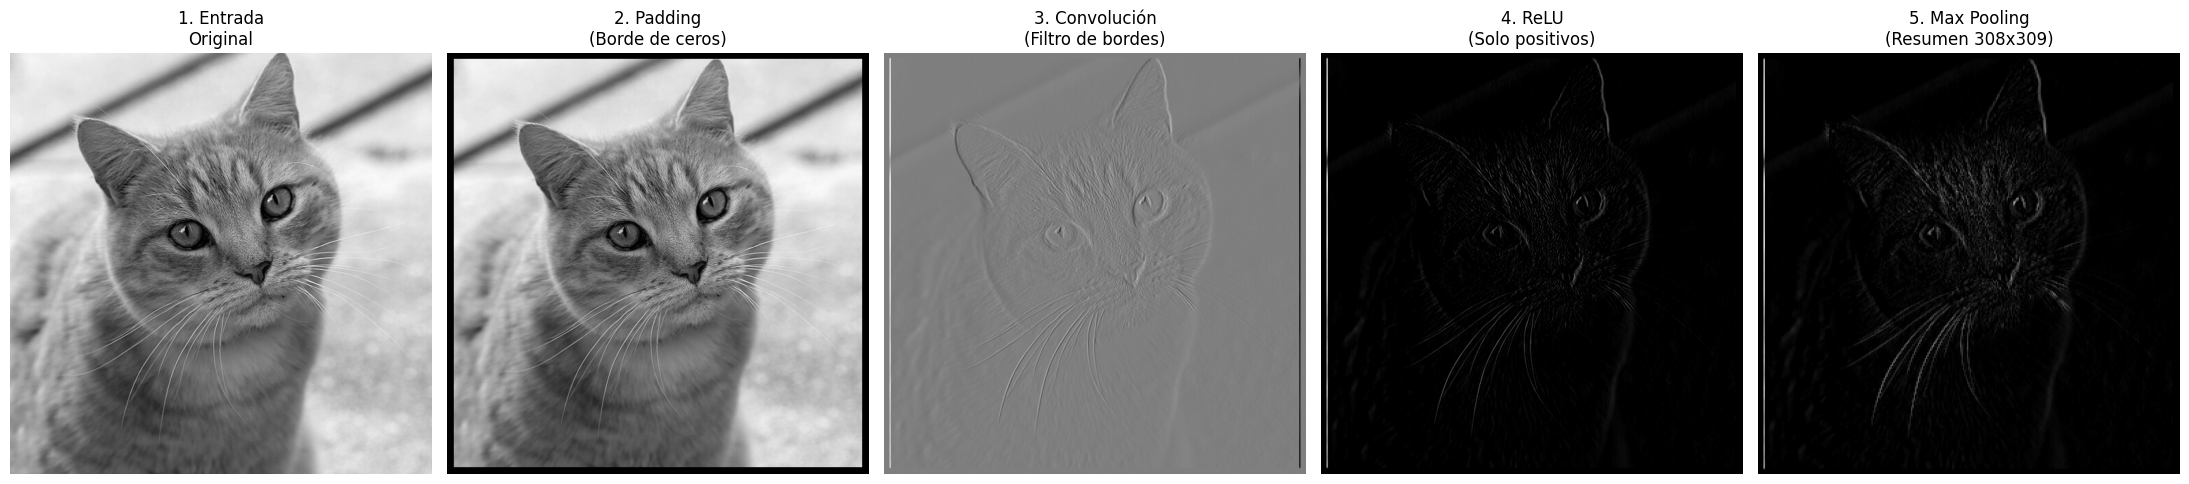

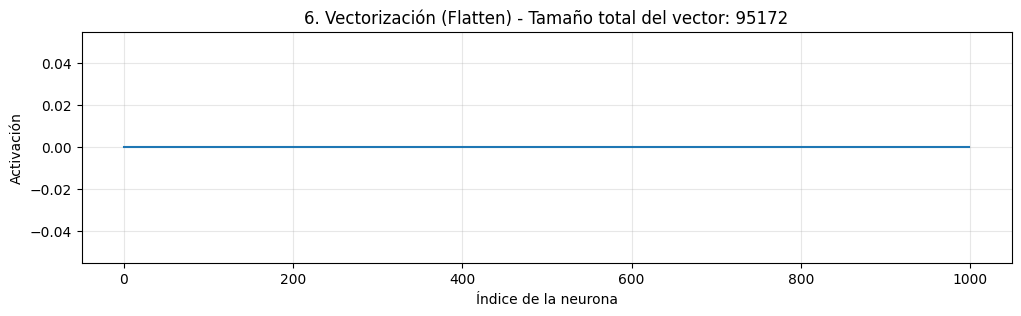

Proceso completado.
Dimensiones finales: torch.Size([1, 1, 308, 309])
